**Evaluation Final EfficientNetB4 Model**

In [1]:
#get repo from github
!git clone https://github.com/melanierbutler/cassava.git

#install cutmix for keras
!pip install cutmix-keras

#get image files from google drive
from google.colab import drive
drive.mount('/gdrive')

data_path = '/gdrive/MyDrive/colab_projects/cassava/cassava_data/'
!cp -r '{data_path}' /content/cassava/data/
!unzip -q /content/cassava/data/cassava_data/\*.zip -d /content/cassava/data/
!mv cassava/data/cassava_data/cutmix-efficientNetB4.h5 cassava/models/

#add to path
import sys
sys.path.append('/content/cassava/src/')

Cloning into 'cassava'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 75 (delta 26), reused 61 (delta 15), pack-reused 0
Unpacking objects: 100% (75/75), done.
Mounted at /gdrive

2 archives were successfully processed.
mv: invalid option -- 'd'
Try 'mv --help' for more information.


In [2]:
#import classes
from preprocessing import *
from cnn_utils import *
from model import *

In [3]:
#define training and save paths and read in training csv and label key
train_dir = '/content/cassava/data/train_images/'
df = pd.read_csv('/content/cassava/data/train.csv')
label_key = pd.read_json('/content/cassava/data/label_num_to_disease_map.json', typ='series')
save_dir = '/gdrive/MyDrive/colab_projects/cassava/models/'
load_fp = '/content/cassava/models/cutmix-efficientNetB4.h5'

In [4]:
model = EfficientNetB4Model(load_fp=load_fp)

Loading model from /content/cassava/models/cutmix-efficientNetB4.h5


In [7]:
#instantiate the ImageFromDFLoader class
dl = ImageFromDFLoader(df, label_key, train_dir)

Found 18188 validated image filenames belonging to 5 classes.
Found 3209 validated image filenames belonging to 5 classes.
Found 3209 validated image filenames belonging to 5 classes.


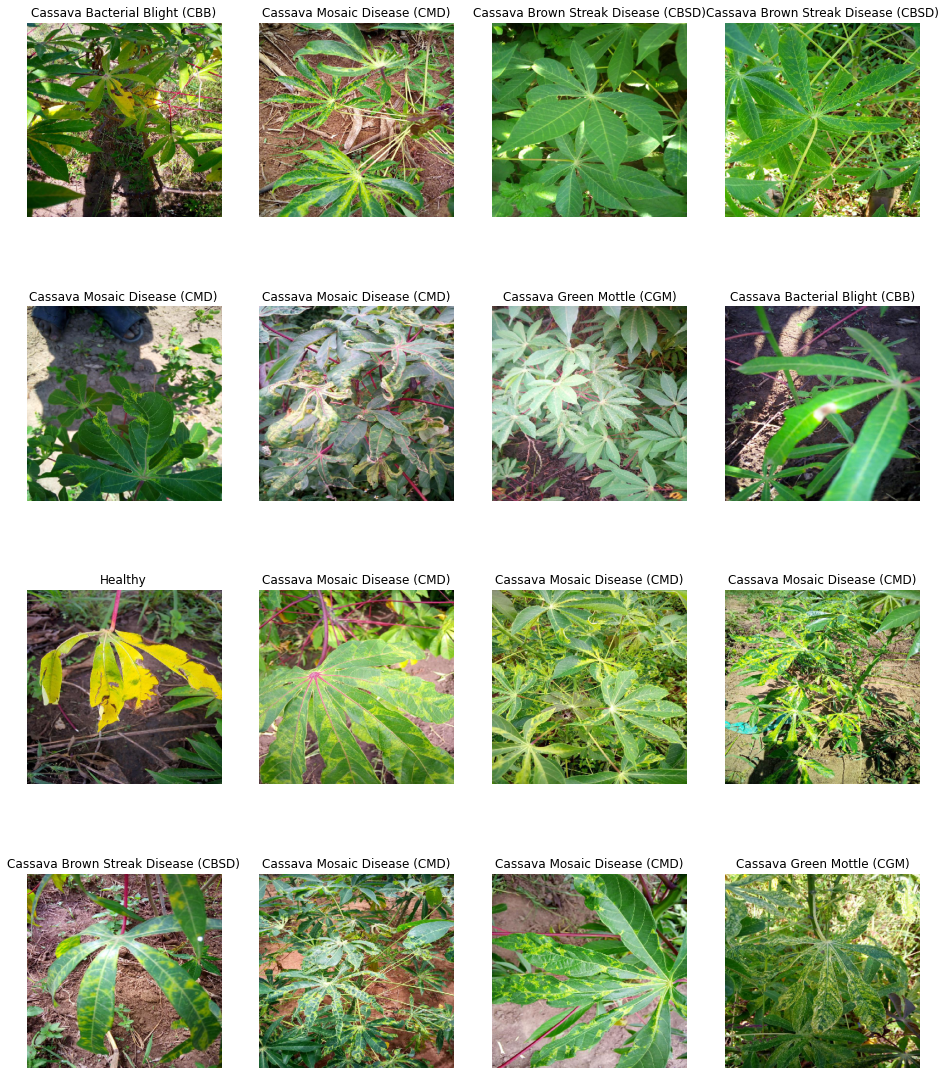

In [7]:
dl.plot_train_batch(generator='eval')

                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.74      0.87      0.80       148
Cassava Brown Streak Disease (CBSD)       0.86      0.87      0.86       326
         Cassava Green Mottle (CGM)       0.78      0.86      0.82       365
       Cassava Mosaic Disease (CMD)       0.99      0.90      0.94      1984
                            Healthy       0.68      0.88      0.77       386

                           accuracy                           0.89      3209
                          macro avg       0.81      0.88      0.84      3209
                       weighted avg       0.90      0.89      0.89      3209



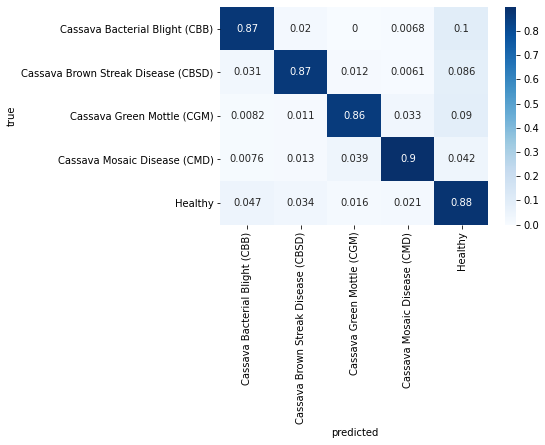

In [8]:
model.evaluate(data_loader=dl)

In [5]:
test_image_path = '/content/cassava/data/test_images/2216849948.jpg'

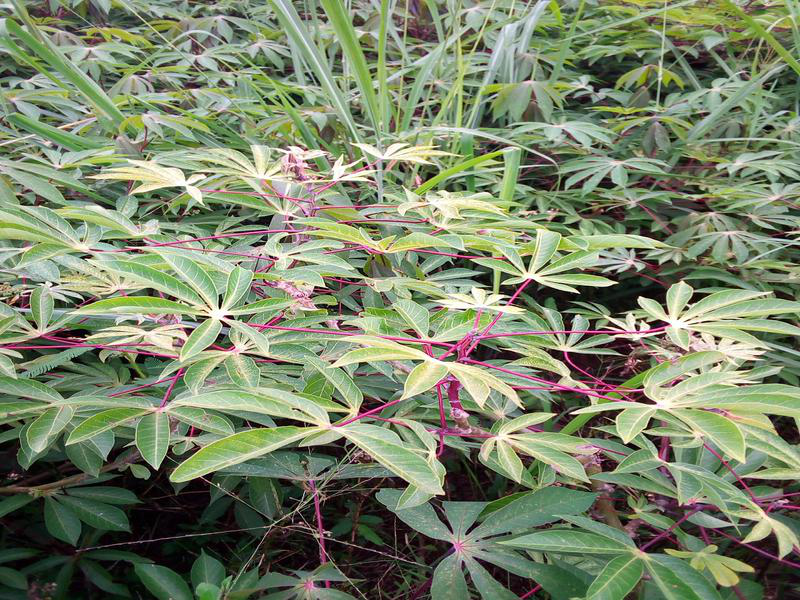

In [8]:
PIL.Image.open(test_image_path)

In [9]:
model.predict_img(test_image_path)

Class: Healthy 
Probability: 87.0
